<a href="https://colab.research.google.com/github/JesseJames50/Analise-Dados-Financeiros/blob/main/Extraindo_dados_ETF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#corrige os bugs do pandas para trabalhar com a biblioteca de dados do yahoo finance
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [ ]:
#importa a biblioteca do yahoo finance
import yfinance as yf
yf.pdr_override() # sobrescreve as funcões de busca do pandas no yahoo finance pelo pandas_dataheader

In [ ]:
# Extrair dados do yahoo finance de um lista de ETF's
# etf = web.get_data_yahoo('WEGE3.SA') #^BVSP
etf = web.get_data_yahoo(['TFLO', 'TLT', 'BLV'],  start="2020-01-01")['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [ ]:
# Limpeza dos dados - removendo os dados NaN
etf_clean = etf.dropna()
etf_clean.head()

Ticker,BLV,TFLO,TLT
Date,,,
2020-01-02,83.755539,46.210331,123.894577
2020-01-03,84.652382,46.219536,125.802620
2020-01-06,84.212257,46.237934,125.088196
2020-01-07,83.880112,46.247124,124.473282
2020-01-08,83.514709,46.247124,123.650459


In [ ]:
#verifica os 10 primeiros dados
etf_clean.head()

Ticker,BLV,TFLO,TLT
Date,,,
2020-01-02,83.755539,46.210331,123.894577
2020-01-03,84.652382,46.219536,125.802620
2020-01-06,84.212257,46.237934,125.088196
2020-01-07,83.880112,46.247124,124.473282
2020-01-08,83.514709,46.247124,123.650459


In [ ]:
# Normalizando os dados para a base 100
etf_base100 = etf_clean / etf_clean.iloc[0] * 100

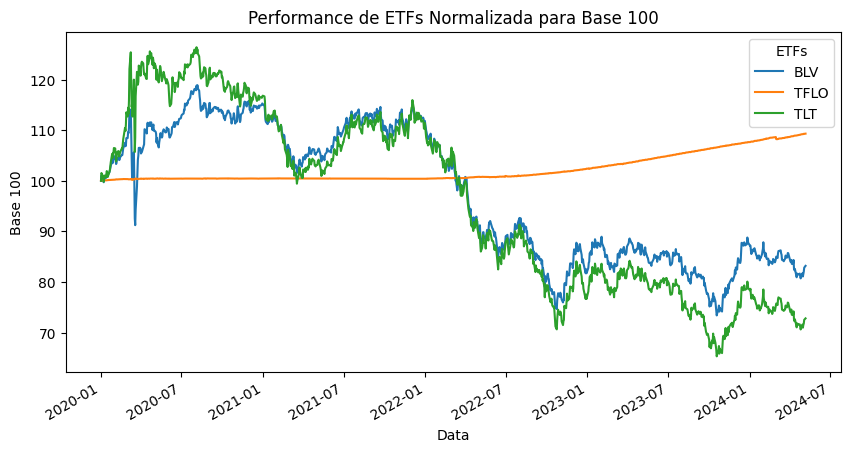

In [ ]:
# Plotando os dados normalizados
etf_base100.plot(figsize=(10, 5))
plt.title('Performance de ETFs Normalizada para Base 100')
plt.ylabel('Base 100')
plt.xlabel('Data')
plt.legend(title='ETFs')
plt.show()

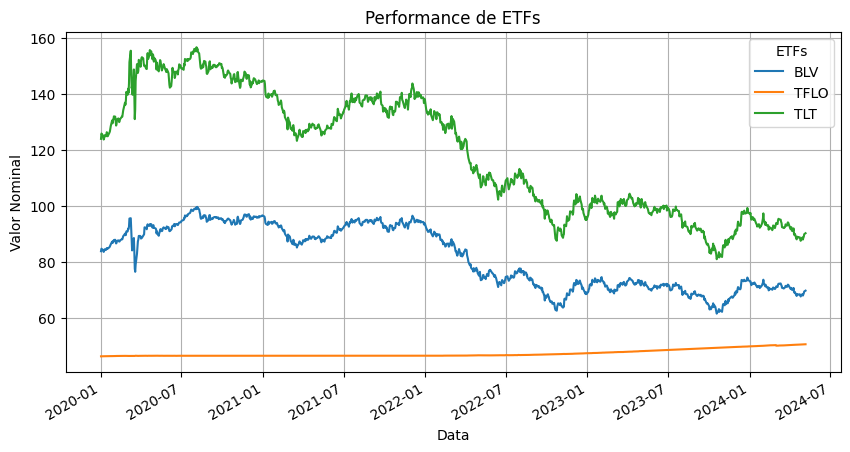

In [ ]:
# Plotando os dados normalizados
etf.plot(figsize=(10, 5))
plt.title('Performance de ETFs')
plt.ylabel('Valor Nominal')
plt.xlabel('Data')
plt.legend(title='ETFs')
plt.grid(True)  # Adiciona uma legenda para identificar cada linha
plt.show()

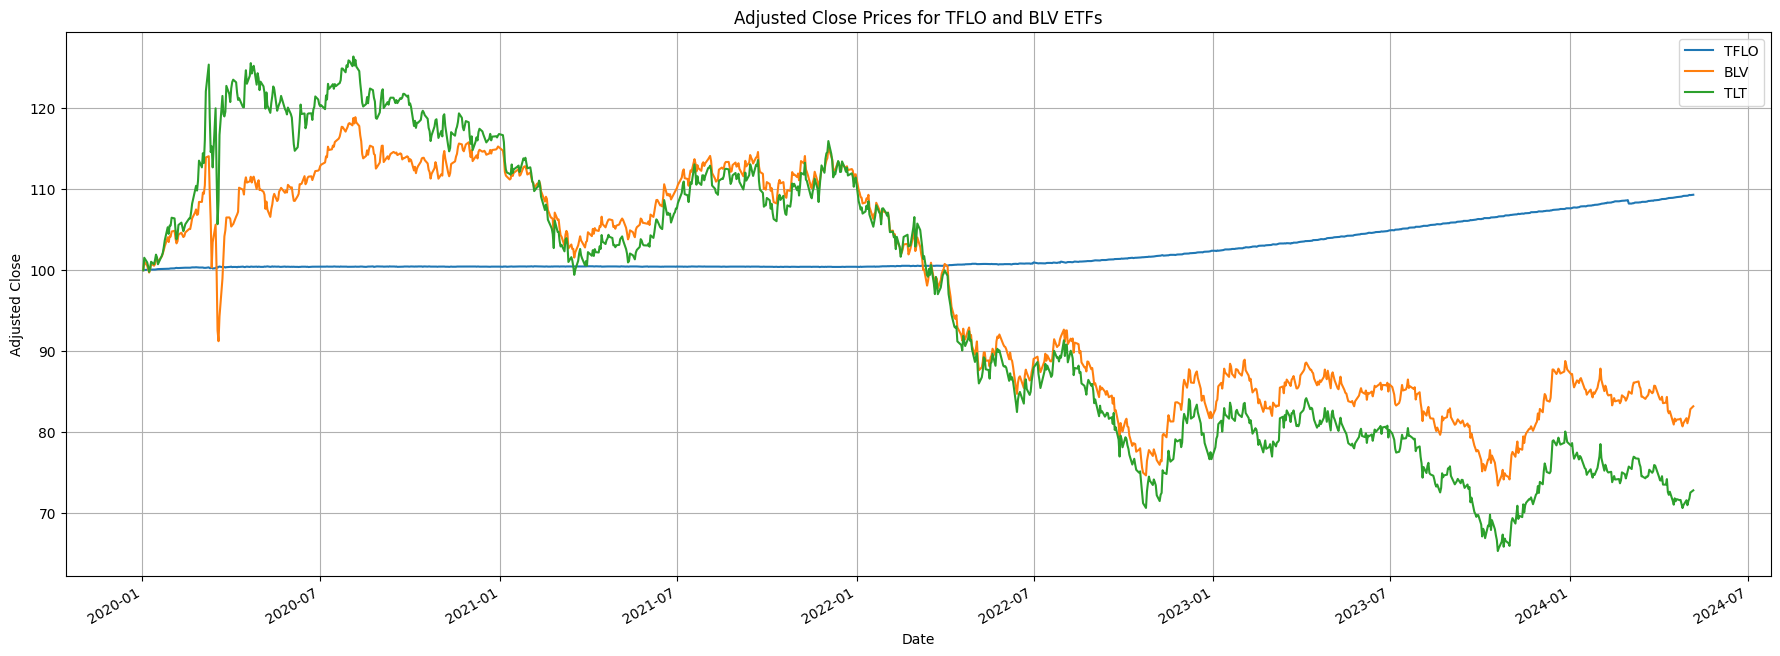

In [ ]:
# Plotando um gráfico com os ETF's de forma individual
plt.figure(figsize=(22, 8))  # Configura o tamanho do gráfico
etf_base100['TFLO'].plot(label='TFLO')  # Plota o ETF TFLO
etf_base100['BLV'].plot(label='BLV')  # Plota o ETF BLV
etf_base100['TLT'].plot(label='TLT')  # Plota o ETF BLV
plt.title('Adjusted Close Prices for TFLO and BLV ETFs')  # Adiciona um título ao gráfico
plt.xlabel('Date')  # Adiciona um rótulo ao eixo X
plt.ylabel('Adjusted Close')  # Adiciona um rótulo ao eixo Y
plt.legend() # Ativa a exibição da grade no gráfico
plt.grid(True)  # Adiciona uma legenda para identificar cada linha
plt.show()  # Exibe o gráfico


In [ ]:
# Calculando a variação percentual diária
etf_daily_pct_change = etf_clean.pct_change()

# Ajustando para cálculo cumulativo (1 + variação percentual)
etf_adjusted_for_cumulative = 1 + etf_daily_pct_change

# Calculando o produto cumulativo para obter a mudança percentual acumulada
etf_cumulative_percentage = etf_adjusted_for_cumulative.cumprod()

# Convertendo o resultado para a base percentual em relação ao primeiro valor
etf_cumulative_percentage_base = etf_cumulative_percentage * 100

# Ajustando o primeiro valor para 100% (pois a primeira variação é NaN e resulta em NaN após o cumprod)
etf_cumulative_percentage_base.iloc[0] = 100

print(etf_cumulative_percentage_base.head(20))


Ticker             BLV        TFLO         TLT
Date                                          
2020-01-02  100.000000  100.000000  100.000000
2020-01-03  101.070786  100.019919  101.540054
2020-01-06  100.545299  100.059734  100.963415
2020-01-07  100.148734  100.079620  100.467095
2020-01-08   99.712461  100.079620   99.802963
2020-01-09  100.128894  100.099531  100.153241
2020-01-10  100.832847  100.079620  101.043666
2020-01-13  100.555228  100.079620  100.737171
2020-01-14  100.743605  100.079620  101.255407
2020-01-15  101.318673  100.099531  101.926824
2020-01-16  101.358316  100.119443  101.605722
2020-01-17  101.070786  100.139379  100.737171
2020-01-21  101.705337  100.159232  101.795480
2020-01-22  102.062287  100.159232  102.153104
2020-01-23  102.538166  100.179135  102.868359
2020-01-24  102.964500  100.179135  103.700486
2020-01-27  104.065019  100.179135  105.313456
2020-01-28  103.480049  100.179135  104.488731
2020-01-29  104.193931  100.199038  105.510548
2020-01-30  1

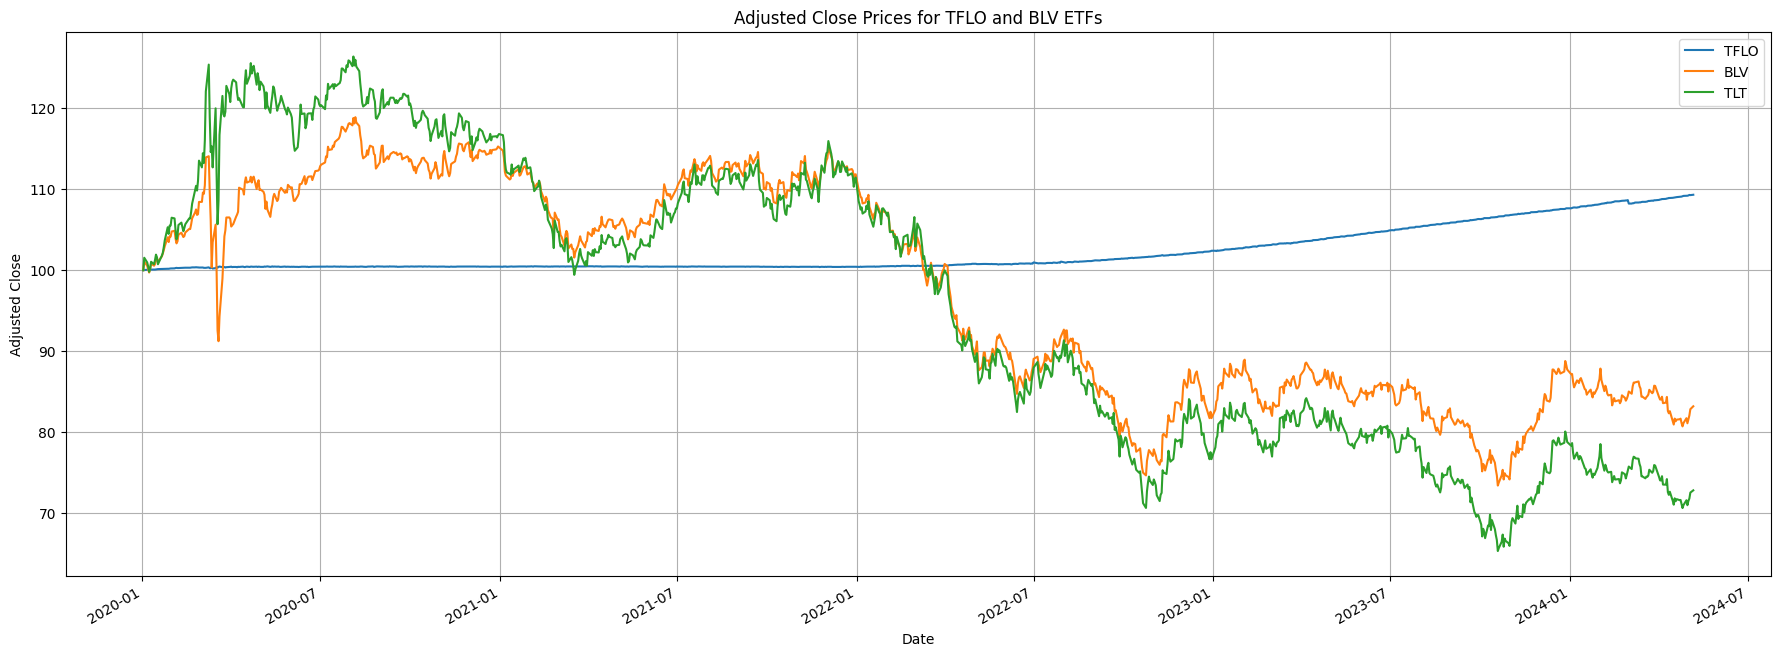

In [ ]:
plt.figure(figsize=(22, 8))  # Configura o tamanho do gráfico
etf_cumulative_percentage_base['TFLO'].plot(label='TFLO')  # Plota o ETF TFLO
etf_cumulative_percentage_base['BLV'].plot(label='BLV')  # Plota o ETF BLV
etf_cumulative_percentage_base['TLT'].plot(label='TLT')  # Plota o ETF BLV
plt.title('Adjusted Close Prices for TFLO and BLV ETFs')  # Adiciona um título ao gráfico
plt.xlabel('Date')  # Adiciona um rótulo ao eixo X
plt.ylabel('Adjusted Close')  # Adiciona um rótulo ao eixo Y
plt.legend() # Ativa a exibição da grade no gráfico
plt.grid(True)  # Adiciona uma legenda para identificar cada linha
plt.show()  # Exibe o gráfico